Case Study Background:

You're working as a Data scientist for an E-
Commerce company FlipKart. The company is

looking to improve product performance, hence,
your task is to analyze a dataset of user reviews
and comments for popular products. The data
includes user reviews, ratings, and various
metadata. Your goal is to uncover patterns,
categorize comments, and extract insights using
unsupervised learning and NLP techniques.

What are the main topics discussed in the

reviews?

02

What insights can be gathered from the
clusters?

03

How do customers generally feel about the
product?

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_csv("Dataset-SA.csv")

data.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [109]:
data.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


Data Preprocessing

In [111]:
# clean the data, so that it will be in optimal shape, to maximum report

In [112]:
# check for missing values


data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [113]:
# fill missing values with none, since we dint want to delete it cos its linked to their ratings as well

data.fillna("None", inplace=True)

In [114]:
data.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [115]:
# drop sentiment column, because we are the ones that want to analyse sentiment

data = data.drop(["Sentiment"], axis=1)

In [116]:
data.head()

,product_name,product_price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product


In [117]:
# Clean the product name column, re is remove library


import re


# create a user defined function to remove multiple unwanted characters from the product name column

def clean_product_name(name):
    name = name.lower()       # converts all texts to lower case
    name = re.sub(r'[^a-zA-z0-9\s]', '', name) # remove punctuations and specila chracaters
    name = re.sub(r'\s+',  ' ', name).strip()


# Apply to the product_name column in the dataset

#data["product_name"] = data["product_name"].apply(clean_product_name) 
data["Review"] = data["Review"].apply(clean_product_name)

In [118]:
data.head()

,product_name,product_price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,None,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,None,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,None,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,None,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,None,ok ok product


In [119]:
# clean the ratings columns and remove text values

# convert the rating column to numeric


data["Rate"] = pd.to_numeric(data["Rate"], errors="coerce")

# drop rows where ratings is NaN (i.e the text values)

data.dropna(subset=["Rate"], inplace=True)

# convert values in rate column to integer type
data["Rate"] = data["Rate"].astype(int)
data.head()

,product_name,product_price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,None,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,None,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,None,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,None,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,None,ok ok product


<Axes: title={'center': 'Distibution of Customer Ratings'}, xlabel='Rate'>

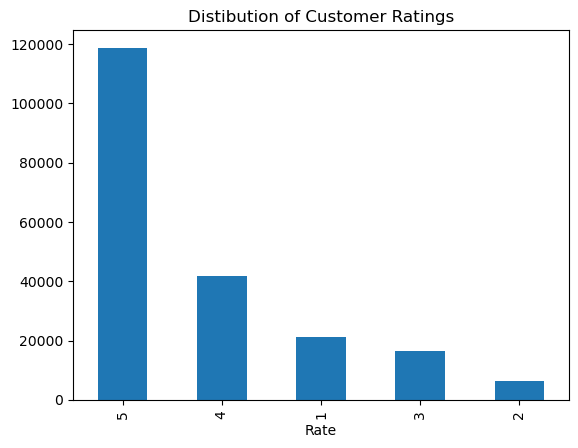

In [120]:
# Visualize count of rating values in a bar plot


data["Rate"].value_counts().plot(kind="bar",title="Distibution of Customer Ratings")

## step 4 : clustering with k-means

Concept: Clustering groups similar reviews together. We’ll use TF-IDF (Term Frequency-Inverse Document Frequency) to convert text into numerical data and then apply K-Means clustering.

Questions to Consider:

1. How many clusters should we create?
2. What common themes emerge in each cluster?

In [122]:
# import necessary libraries for clustering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans





Vectorization

Vectorize the text in the review column(Convert texts or words into numbers)
Vectorizing is used in NLP to map words or phrases from dataset or column to a corresponding vector of numbers which nis then used to 
to find word predictions or similarities.

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Initialize TfidfVectorizer with a maximum of 1000 features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data["Review"])

# Apply K means clustering
kmeans= KMeans(n_clusters=5,random_state=42)
data["Cluster"]= kmeans.fit_predict(X)


# Preview Clusters
data[["Review","Cluster"]].head()


ValueError: empty vocabulary; perhaps the documents only contain stop words

# step 5 : Topic Modelling

Displaying top topics within each cluster

In [132]:
# import necessary libraries

from sklearn.decomposition import LatentDirichletAllocation


# Initializing LDA model

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
words = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index+1}:")
    print([words[i] for i in topic.argsort()[-10:]])

NameError: name 'X' is not defined

# Step 6 : Sentiments Analysis- VADER

Vader- Valence Aware Dictionary and Sentiment Reasoner-
Is a tool for sentiment analysis whic is basically a way to figure out if a place of text is expressingnpositive, negative or neutral emotions

In [151]:
#nltk-natural language toolkit

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")


# Initialize Sentiment Analyzer
sid = SentimentIntensityAnalyzer()


# Apply sentiment Analysis
data["Sentiment_Score"] = data["Review"].apply(lambda x: sid.polarity_scores(x)["compund"])
data["Sentiment_Score"].apply(lambda x: "Positive" if x >=0.05 else("Negative" if x <=-0.05 else else ('Negative' if x <= -0.05 else 'Neutral'))

# Preview Sentiment analysis
data[['Review', 'Sentiment_Score', 'Sentiment_Label']].head(10)

SyntaxError: invalid syntax (1018452997.py, line 14)

In [149]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


# Step 8 : Customer Rating Predictions Using Regressions Algorithms

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
# Calculate Average Rating per product

product_avg_rating = data.groupby("product_name")["Rate"].mean().rename("Product_Avg_rating")
data = data.join(product_avg_rating, on="product_name")

In [159]:
# 8.1 Feature Selection ( seperatte features(independent varuiables) from label(deoendent variable or target)
features = ["Product_Avg_Rating", "Sentiment_Score"]
X= data["features"] # label
y = data["Rate"] # Features


KeyError: 'features'

In [ ]:
# 8.2 -Dividing data into train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [157]:
# 8.3 Initialize and train RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# 8.4  Predict and Evaluate
y_pred = model.predict(X_test)

model.score(X_test, y_test)

In [ ]:
### 8.5  Root Mean Square for Random Forest

from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

In [ ]:
### Linear Regressor

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

lr_pred = linear_regressor.predict(X_test)

linear_regressor.score(X_test, y_test)

### Step 9: Insights and Interpretaions

Since the rating values expected are from 1-5, an RSME of 0.8124 indicates relatively low error on the Random Forest Regressor and Linear Regressor

An RMSE of 0.8124 is interpreted is relatively good since our train was on 20% of the target variable